In [4]:
# default_exp geoms

# Geo-Data Intake and Operations

> This notebook was made to demonstrate how to work with geographic data.

This Coding Notebook is the __third__ in a series.

An Interactive version can be found here <a href="https://colab.research.google.com/github/karpatic/dataplay/blob/master/notebooks/03_Map_Basics_Intake_and_Operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>.


This colab and more can be found on our [webpage](https://karpatic.github.io/dataplay/). 

- Content covered in previous tutorials will be used in later tutorials. 

- __New code and or  information *should* have explanations and or descriptions__ attached. 

- Concepts or code covered in previous tutorials will be used without being explaining in entirety.

- The [Dataplay](https://karpatic.github.io/dataplay/) Handbook development techniques covered in the [Datalabs](https://karpatic.github.io/datalabs/) Guidebook

- __If content can not be found in the current tutorial and is not covered in previous tutorials, please let me know.__

- This notebook has been optimized for Google Colabs ran on a Chrome Browser. 

- Statements found in the index page on view expressed, responsibility, errors and ommissions, use at risk, and licensing  extend throughout the tutorial.

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/karpatic/datalab/master?filepath=%2Fnotebooks%2Findex.ipynb)
[![Binder](https://pete88b.github.io/fastpages/assets/badges/colab.svg)](https://colab.research.google.com/github/karpatic/datalab/blob/master/notebooks/index.ipynb)
[![Binder](https://pete88b.github.io/fastpages/assets/badges/github.svg)](https://github.com/karpatic/datalab/tree/master/notebooks/index.ipynb)
[![Open Source Love svg3](https://badges.frapsoft.com/os/v3/open-source.svg?v=103)](https://github.com/ellerbrock/open-source-badges/)

[![NPM License](https://img.shields.io/npm/l/all-contributors.svg?style=flat)](https://github.com/karpatic/dataplay/blob/master/LICENSE)
[![Active](http://img.shields.io/badge/Status-Active-green.svg)](https://karpatic.github.io) 
[![Python Versions](https://img.shields.io/pypi/pyversions/dataplay.svg)](https://pypi.python.org/pypi/dataplay/)
[![GitHub last commit](https://img.shields.io/github/last-commit/karpatic/dataplay.svg?style=flat)]() 
[![No Maintenance Intended](http://unmaintained.tech/badge.svg)](http://unmaintained.tech/) 

[![GitHub stars](https://img.shields.io/github/stars/karpatic/dataplay.svg?style=social&label=Star)](https://github.com/karpatic/dataplay) 
[![GitHub watchers](https://img.shields.io/github/watchers/karpatic/dataplay.svg?style=social&label=Watch)](https://github.com/karpatic/dataplay) 
[![GitHub forks](https://img.shields.io/github/forks/karpatic/dataplay.svg?style=social&label=Fork)](https://github.com/karpatic/dataplay) 
[![GitHub followers](https://img.shields.io/github/followers/karpatic.svg?style=social&label=Follow)](https://github.com/karpatic/dataplay) 

[![Tweet](https://img.shields.io/twitter/url/https/github.com/karpatic/dataplay.svg?style=social)](https://twitter.com/intent/tweet?text=Check%20out%20this%20%E2%9C%A8%20colab%20by%20@bniajfi%20https://github.com/karpatic/dataplay%20%F0%9F%A4%97) 
[![Twitter Follow](https://img.shields.io/twitter/follow/bniajfi.svg?style=social)](https://twitter.com/bniajfi)

## About this Tutorial: 

⚠️ The writing is a work in progress. The functions work. ⚠️

### Whats Inside?

#### __The Tutorial__

In this notebook, the basics of working with geographic data are introduced.

- Reading in data (points/ geoms)
-- Convert lat/lng columns to point coordinates
-- Geocoding address to coordinates
-- Changing coordinate reference systems
-- Connecting to PostGisDB's
- Basic Operations
- Saving shape data
- Get Polygon Centroids
- Working with Points and Polygons
-- Map Points and Polygons
-- Get Points in Polygons
-- Create Choropleths
-- Create Heatmaps (KDE?)

#### __Objectives__

By the end of this tutorial users should have an understanding of:
- How to read in and process geo-data asa geo-dataframe.
- The Coordinate Reference System and Coordinate Encoding
- Basic geo-visualization strategies 

# Background

An expansice discursive on programming and cartography can be found [here](https://medium.com/@mbostock/command-line-cartography-part-1-897aa8f8ca2c)

### Datatypes and Geo-data

Geographic data must be [encoded](https://www.blender.org/fileadmin/verse/spec/protocol-encoding.html#:~:text=3.3.-,Data%20Encoding,is%20specified%20in%20this%20section.) properly order to attain the full potential of the spatial nature of your geographic data.

If you have read in a dataset using *pandas* it's data type will be a **Dataframe**.

It may be converted into a **Geo-Dataframe** using *Geopandas* as demonstrated in the sections below. 

You can check a variables at any time using the [dtype]((https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html) command:

```
yourGeoDataframe.dtype
```




## Coordinate Reference Systems (CRS)

**Make sure** the appropriate spatial *Coordinate Reference System* (CRS) is used when reading in your data!

ala [wiki](https://en.wikipedia.org/wiki/Spatial_reference_system):
> A spatial reference system (SRS) or coordinate reference system (CRS) is a coordinate-based local, regional or global system used to locate geographical entities

**CRS 4326** is the CRS most people are familar with when refering to latiude and longitudes.

Baltimore's 4326 CRS should be at (39.2, -76.6)

BNIA uses [CRS 2248](http://www.spatialreference.org/ref/epsg/2248/) *internally*

Additional Information: https://docs.qgis.org/testing/en/docs/gentle_gis_introduction/coordinate_reference_systems.html

Ensure your geodataframes' coordinates are using the same CRS using the geopandas command: 

```
yourGeoDataframe.CRS
```

## Coordinate Encoding

When first recieving a spatial dataset, the spatial column may need to be encoded to convert its 'text' data type values into understood 'coordinate' data types before it can be understood/processed accordingly. 

Namely, there are two ways to encode text into coordinates: 
- df[geom] = df[geom].apply(lambda x: loads( str(x) ))
- df[geom] = [Point(xy) for xy in zip(df.x, df.y)]

The first approach can be used for text taking the form "Point(-76, 39)" and will encode the text too coordinates.
The second approach is useful when creating a point from two columns containing lat/lng information and will create Point coordinates from the two columns.

More on this later

## Raster Vs Vector Data 

There exists two types of Geospatial Data, Raster and Vector. 
Both have different file formats.

This lab will only cover vector data.

### Vector Data 
Vector Data: Individual points stored as (x,y) coordinates pairs. These points can be joined to create lines or polygons.

Format of Vector data

Esri Shapefile — .shp, .dbf, .shx
Description - Industry standard, most widely used. The three files listed above are needed to make a shapefile. Additional file formats may be included.

Geographic JavaScript Object Notation — .geojson, .json
Description — Second most popular, Geojson is typically used in web-based mapping used by storing the coordinates as JSON.

Geography Markup Language — .gml
Description — Similar to Geojson, GML has more data for the same amount of information.

Google Keyhole Markup Language  — .kml, .kmz
Description — XML-based and predominantly used for google earth. KMZ is a the newer, zipped version of KML.

### Raster Data 
Raster Data: Cell-based data where each cell represent geographic information. An Aerial photograph is one such example where each pixel has a color value

Raster Data Files: 
GeoTIFF — .tif, .tiff, .ovr
ERDAS Imagine — .img
IDRISI Raster — .rst, .rdc


Information Sourced From: https://towardsdatascience.com/getting-started-with-geospatial-works-1f7b47955438

**Vector Data: Census Geographic Data**:
- **Geographic Coordinate Data** is provided by the census and compliments their census geographies 
- https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2010.html
- https://www.census.gov/programs-surveys/acs/geography-acs/geography-boundaries-by-year.html 
- Bnia created and provides for free geographic boundary data that compliment these CSA's

# Guided Walkthrough

## SETUP:

### Import Modules

In [5]:
%%capture
!pip install geopandas
!pip install VitalSigns

In [ ]:
!apt install libspatialindex-dev
!pip install rtree

In [7]:
# @title Run: Install Modules
%%capture
! pip install geopy 
! pip install geoplot 

In [20]:
#hide
t = """
!pip install nbdev
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/'Software Development Documents'/dataplay/
"""
# !pip install dataplay

Mounted at /content/drive
/content/drive/My Drive/Software Development Documents/dataplay


In [21]:
# export
# @title Run: Import Modules

# These imports will handle everything
import os
import sys
import csv
import numpy as np
import pandas as pd
import pyproj
from pyproj import Proj, transform
# conda install -c conda-forge proj4
from shapely.geometry import LineString
# from shapely import wkb
# https://pypi.org/project/geopy/
import folium

# In case file is KML, enable support
import fiona
fiona.drvsupport.supported_drivers['kml'] = 'rw'
fiona.drvsupport.supported_drivers['KML'] = 'rw'

import psycopg2

In [22]:
import matplotlib.pyplot as plt
import IPython
from IPython.core.display import HTML

import os 
from branca.colormap import linear

In [23]:
#export
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point
from shapely.wkt import loads
from geopy.geocoders import Nominatim
from IPython.display import clear_output
from folium import plugins
from folium.plugins import TimeSliderChoropleth 
from folium.plugins import MarkerCluster
from dataplay import merge
from dataplay import intaker
from VitalSigns import acsDownload

/usr/local/lib/python3.7/dist-packages/VitalSigns/acsDownload.py:27: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


### Configure Enviornment

In [ ]:
# This will just beautify the output
 
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.precision', 2)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
 
# pd.set_option('display.expand_frame_repr', False)
# pd.set_option('display.precision', 2)
# pd.reset_option('max_colwidth')
pd.set_option('max_colwidth', 50)
# pd.reset_option('max_colwidth')

In [ ]:
#hide
# %matplotlib inline
# !jupyter nbextension enable --py widgetsnbextension

## Retrieve GIS Data

As mentioned earlier: 

When you use a pandas function to 'read-in' a dataset, the returned value is of a datatype called a 'Dataframe'. 

We need a 'Geo-Dataframe', however, to effectively work with spatial data. 

While Pandas does not support Geo-Dataframes; Geo-pandas does. 

Geopandas has everything you love about pandas, but with added support for geo-spatial data.

Principle benefits of using Geopandas over Pandas when working with spatial data: 
- The geopandas plot function will now render a map by default using your 'spatial-geometries' column.
- Libraries exist spatial-operations and interactive map usage.

There are many ways to have our spatial-data be read-in using geo-pandas into a geo-dataframe.

Namely, it means reading in Geo-Spatial-data from a:
1. (.geojson or .shp) file directly using Geo-pandas
2. (.csv, .json) file using Pandas and convert it to Geo-Pandas 
  - using a prepared 'geometry' column
  - by transformting latitude and longitude columns into a 'geometry' column.
  - acquiring coordinates from an address
  - mapping your non-spatial-data to data-with-space 
3. Connecting to a DB

We will review each one below

### Approach 1: Reading in Data Directly

If you are using Geopandas, direct imports **only work** with geojson and shape files. 

spatial coordinate data is properly encoded with these types of files soas to make them particularly easy to use.

You can perform this using geopandas' `read_file()` function.

In [ ]:
# This dataset is taken from the public database provided by BNIAJFI hosted by Esri / ArcGIS
# BNIA ArcGIS Homepage: https://data-bniajfi.opendata.arcgis.com/
csa_gdf = intaker.Intake.getData("https://services1.arcgis.com/mVFRs7NF4iFitgbY/ArcGIS/rest/services/Hhchpov/FeatureServer/0/query?where=1%3D1&outFields=*&returnGeometry=true&f=pgeojson")

As you can see, the resultant variable is of type GeoDataFrame.

In [ ]:
type(csa_gdf)

GeoDataFrames are only possible when one of the columns are of a 'Geometry' Datatype

In [ ]:
csa_gdf.dtypes

Awesome. So that means, now you can plot maps all prety like: 

In [ ]:
csa_gdf.plot(column='hhchpov15')

And now lets take a peak at the raw data:

In [ ]:
csa_gdf.head(1)

I'll show you more ways to save the data later, but for our example in the next section to work, we need a csv. 

We can make one by saving the geo-dataframe avove using the `to_gdf` function.

The spatial data will be stored in an encoded form that will make it easy to re-open up in the future.

In [ ]:
csa_gdf.to_csv('example.csv')

### Approach 2: Converting Pandas into Geopandas

#### Approach 2: Method 1: Convert using a pre-formatted 'geometry' column

This approach loads a map using a geometry column

In our previous example, we saved a geo-dataframe as a csv. 

Now lets re-open it up using pandas!

In [ ]:
# A url to a public Dataset.
url = "example.csv"
geom = 'geometry'
# An example of loading in an internal BNIA file
crs = {'init' :'epsg:2248'} 
 
# Read in the dataframe
csa_gdf = intaker.Intake.getData(url)

Great!

But now what?

Well, for starters, regardless of the project you are working on: It's always a good idea to inspect your data. 

This is particularly important if you don't know what you're working with. 

In [ ]:
csa_gdf.head(1)

Take notice of how the geometry column has a special.. foramatting. 

All spatial data must take on a similar form encoding for it to be properly interpretted as a spatial data-type. 

As far as I can tell, This is near-identical to the table I printed out in our last example. 

BUT WAIT!

You'll notice, that if I run the plot function a pretty map will not de-facto appear

In [ ]:
csa_gdf.plot()

Why is this? Because you're not working with a geo-dataframe but just a dataframe!

Take a look:

In [ ]:
type(csa_gdf)

Okay... So thats not right..

What can we do about this?

Well for one, our spatial data (in the geometry-column) is not of the right data-type even though it takes on the right form.

In [ ]:
csa_gdf.dtypes

Ok. So how do we change it? Well, since it's already been properly encoded... 

You can convert a columns data-type from an object (or whatver else) to a 'geometry' using the `loads` function. 

In the example below, we convert the datatypes for all records in the 'geometry' column 

In [ ]:
# Convert the geometry column datatype from a string of text into a coordinate datatype
csa_gdf[geom] = csa_gdf[geom].apply(lambda x: loads( str(x) ))

Thats all! Now lets see the geometry columns data-type and the entire tables's data-type

In [ ]:
csa_gdf.dtypes

In [ ]:
type(csa_gdf)

As you can see, we have a geometry column of the right datatype, but our table is still only just a dataframe. 

But now, you are ready to convert your entire pandas dataframe into a geo-dataframe.

You can do that by running the following function: 

In [ ]:
# Process the dataframe as a geodataframe with a known CRS and geom column
csa_gdf = GeoDataFrame(csa_gdf, crs=crs, geometry=geom)

Aaaand BOOM.

In [ ]:
csa_gdf.plot(column='hhchpov18')

goes the dy-no-mite

In [ ]:
type(csa_gdf)

#### Approach 2: Method 2: Convert Column(s) to Coordinate

##### Approach 2: Method 2: Example: A Generic Outline

This is the generic example but it will not work since no URL is given.

In [ ]:
# More Information: https://geopandas.readthedocs.io/en/latest/gallery/create_geopandas_from_pandas.html#from-longitudes-and-latitudes
 
# If your data has coordinates in two columns run this cell
# It will create a geometry column from the two.
# A public dataset is not provided for this example and will not run.
 
# Load DF HERE. Accidently deleted the link. Need to refind. 
# Just rely on example 2 for now. 
"""
exe_df['x'] = pd.to_numeric(exe_df['x'], errors='coerce')
exe_df['y'] = pd.to_numeric(exe_df['y'], errors='coerce')
# exe_df = exe_df.replace(np.nan, 0, regex=True)
 
# An example of loading in an internal BNIA file
geometry=[Point(xy) for xy in zip(exe_df.x, exe_df.y)]
exe_gdf = gpd.GeoDataFrame( exe_df.drop(['x', 'y'], axis=1), crs=crs, geometry=geometry)
"""

##### Approach 2: Method 2:  Example: Geoloom

Since I do not readily have a dataset with lat and long's I will have to make one.

We can split the coordinates from a geodataframe like so...

In [ ]:
# Alternate Primary Table
# Table: Geoloom, 
# Columns:  
# In this example, we are going to read in a shapefile
geoloom_gdf = gpd.read_file("https://services1.arcgis.com/mVFRs7NF4iFitgbY/ArcGIS/rest/services/Geoloom_Crowd/FeatureServer/0/query?where=1%3D1&outFields=*&returnGeometry=true&f=pgeojson");
# then create columns for its x and y coords
geoloom_gdf['POINT_X'] = geoloom_gdf['geometry'].centroid.x
geoloom_gdf['POINT_Y'] = geoloom_gdf['geometry'].centroid.y
# Now lets just drop the geometry column and save it to have our example dataset. 
geoloom_gdf = geoloom_gdf.dropna(subset=['geometry'])
geoloom_gdf.to_csv('example.csv')

The first thing you will want to do when given a dataset with a coordinates column is ensure its datatype.

In [ ]:
geoloom_df = pd.read_csv('example.csv')
# We already know the x and y columns because we just saved them as such.
geoloom_df['POINT_X'] = pd.to_numeric(geoloom_df['POINT_X'], errors='coerce')
geoloom_df['POINT_Y'] = pd.to_numeric(geoloom_df['POINT_Y'], errors='coerce')
# df = df.replace(np.nan, 0, regex=True)
 
# And filter out for points only in Baltimore City. 
geoloom_df = geoloom_df[ geoloom_df['POINT_Y'] > 39.3  ]
geoloom_df = geoloom_df[ geoloom_df['POINT_Y'] < 39.5  ]

In [ ]:
# An example of loading in an internal BNIA file
crs = {'init' :'epsg:2248'} 
geometry=[Point(xy) for xy in zip(geoloom_df['POINT_X'], geoloom_df['POINT_Y'])]
geoloom_gdf = gpd.GeoDataFrame( geoloom_df.drop(['POINT_X', 'POINT_Y'], axis=1), crs=crs, geometry=geometry)
# 39.2904° N, 76.6122°

In [ ]:
geoloom_gdf.head(1)

Heres a neat trick to make it more presentable, because those points mean nothing to me.

In [ ]:
# Create our base layer.
ax = csa_gdf.plot(column='hhchpov18', edgecolor='black')
 
# now plot our points over it.
geoloom_gdf.plot(ax=ax, color='red')
 
plt.show()

##### Approach 2: Method 3: Using a Crosswalk (Need Crosswalk on Esri)

When you want to merge two datasets that do not share a common column, it is often useful to create a 'crosswalk' file that 'maps' records between two datasets. We can do this to append spatial data when a direct merge is not readily evident. 

Check out this next example where we pull ACS Census data and use its 'tract' column and map it to a community. We can then aggregate the points along a the communities they belong to and map it on a choropleth!

We will set up our ACS query variables right here for easy changing

In [ ]:
# Our download function will use Baltimore City's tract, county and state as internal paramters
# Change these values in the cell below using different geographic reference codes will change those parameters
tract = '*'
county = '510' # '059' # 153 '510'
state = '24' #51
 
# Specify the download parameters the function will receieve here
tableId = 'B19049' # 'B19001'
year = '17'
saveAcs = True 

And now we will call the function with those variables and check out the result

In [ ]:
retrieve_acs_data = acsDownload.retrieve_acs_data
IPython.core.display.HTML("<style>.rendered_html th {max-width: 200px; overflow:auto;}</style>")
# state, county, tract, tableId, year, saveOriginal, save 
df = retrieve_acs_data(state, county, tract, tableId, year, saveAcs)
df.head(1)
df.to_csv('tracts_data.csv')

This contains the CSA labels we will map our tracts to. This terminal command will download it

In [ ]:
!wget https://raw.githubusercontent.com/bniajfi/bniajfi/main/CSA-to-Tract-2010.csv

Here 

In [ ]:
crosswalk = pd.read_csv('CSA-to-Tract-2010.csv')
crosswalk.tail(1)

In [ ]:
from dataplay import merge
mergeDatasets = merge.mergeDatasets

merged_df_geom = mergeDatasets(left_ds=df, right_ds=crosswalk, crosswalk_ds=False,
                  left_col='tract', right_col='TRACTCE10',
                  crosswalk_left_col = False, crosswalk_right_col = False,
                  merge_how='outer', # left right or columnname to retrieve
                  interactive=False)
merged_df_geom.head(1)

In [ ]:
import geopandas as gpd
Hhchpov = gpd.read_file("https://services1.arcgis.com/mVFRs7NF4iFitgbY/ArcGIS/rest/services/Hhchpov/FeatureServer/0/query?where=1%3D1&outFields=*&returnGeometry=true&f=pgeojson")
Hhchpov = Hhchpov[['CSA2010', 'hhchpov15',	'hhchpov16',	'hhchpov17',	'hhchpov18', 'geometry']]
Hhchpov.to_file("Hhchpov.geojson", driver='GeoJSON')
Hhchpov.to_csv('Hhchpov.csv')
gpd.read_file("Hhchpov.geojson").head(1)

In [ ]:
# A simple merge
# df.merge(crosswalk, left_on='tract', right_on='TRACTCE10')

A simple example of how this would work

In [ ]:
# A simple merge
merged_df = mergeDatasets(left_ds=merged_df_geom, right_ds=Hhchpov, crosswalk_ds=False,
                  left_col='CSA2010', right_col='CSA2010',
                  crosswalk_left_col = False, crosswalk_right_col = False,
                  merge_how='outer', # left right or columnname to retrieve
                  interactive=False)

In [ ]:
# geoms.readInGeometryData(url='Hhchpov.geojson').head(0)

In [ ]:

# The attributes are what we will use.
in_crs = 2248 # The CRS we recieve our data 
out_crs = 4326 # The CRS we would like to have our data represented as
geom = 'geometry' # The column where our spatial information lives.

# To create this dataset I had to commit a full outer join. 
# In this way geometries will be included even if there merge does not have a direct match. 
# What this will do is that it means at least one (near) empty record for each community will exist that includes (at minimum) the geographic information and name of a Community.
# That way if no point level information existed in the community, that during the merge the geoboundaries are still carried over.

# Primary Table
# Description: I created a public dataset from a google xlsx sheet 'Bank Addresses and Census Tract'.
# Table: FDIC Baltimore Banks
# Columns: Bank Name, Address(es), Census Tract
left_ds = 'tracts_data.csv'
left_col = 'tract'

# Crosswalk Table
# Table: Crosswalk Census Communities
# 'TRACT2010', 'GEOID2010', 'CSA2010'
crosswalk_ds = 'CSA-to-Tract-2010.csv'
use_crosswalk = True
crosswalk_left_col = 'TRACTCE10'
crosswalk_right_col = 'CSA2010'

# Secondary Table
# Table: Baltimore Boundaries => HHCHPOV
# 'TRACTCE10', 'GEOID10', 'CSA', 'NAME10', 'Tract', 'geometry'
right_ds = 'Hhchpov.geojson'
right_col ='CSA2010'

interactive = True
merge_how = 'outer'

# reutrns a pandas dataframe
mergedf = merge.mergeDatasets( left_ds=left_ds, left_col=left_col, 
              crosswalk_ds=crosswalk_ds,
              crosswalk_left_col = crosswalk_left_col, crosswalk_right_col = crosswalk_right_col,
              right_ds=right_ds, right_col=right_col, 
              merge_how=merge_how, interactive = interactive )

In [ ]:
mergedf.dtypes

In [ ]:
# Convert the geometry column datatype from a string of text into a coordinate datatype
# mergedf[geom] = mergedf[geom].apply(lambda x: loads( str(x) ) ) 

# Process the dataframe as a geodataframe with a known CRS and geom column 
mergedGdf = GeoDataFrame(mergedf, crs=in_crs, geometry=geom) 

In [ ]:
mergedGdf.plot()

##### Approach 2: Method 4: Geocoding Addresses and Landmarks to Coordinates

Sometimes (usually) we just don't have the coordinates of a place, but we do know it's address or that it is an established landmark. 

In such cases we attempt 'geo-coding' these points in an automated manner.

While convenient, this process is error prone, so be sure to check it's work!

For this next example to take place, we need a dataset that has a bunch of addresses. 

We can use the geoloom dataset from before in this example. We'll just drop geo'spatial data.

In [ ]:
geoloom = gpd.read_file("https://services1.arcgis.com/mVFRs7NF4iFitgbY/ArcGIS/rest/services/Geoloom_Crowd/FeatureServer/0/query?where=1%3D1&outFields=*&returnGeometry=true&f=pgeojson");
geoloom = geoloom.dropna(subset=['geometry'])
geoloom = geoloom.drop(columns=['geometry','GlobalID', 'POINT_X',	'POINT_Y'])
geoloom.head(1)

But if for whatever reason the link is down, you can use this example dataframe mapping just some of the many malls in baltimore.

In [ ]:
address_df = pd.DataFrame({ 
    'Location' : pd.Series([
    '100 N. Holliday St, Baltimore, MD 21202',
    '200 E Pratt St, Baltimore, MD',
    '2401 Liberty Heights Ave, Baltimore, MD',
    '201 E Pratt St, Baltimore, MD',
    '3501 Boston St, Baltimore, MD',
    '857 E Fort Ave, Baltimore, MD',
    '2413 Frederick Ave, Baltimore, MD'
  ]),
    'Address' : pd.Series([ 
    'Baltimore City Council',
    'The Gallery at Harborplace',
    'Mondawmin Mall',
    'Harborplace',
    'The Shops at Canton Crossing',
    'Southside Marketplace',
    'Westside Shopping Center'
  ])
})

address_df.head()

You can use either the Location or Address column to perform the geo-coding on.

In [ ]:
address_df = geoloom.copy()
addrCol = 'Location'

This function takes a while. The less columns/data/records the faster it executes.

In [ ]:
# More information vist: https://geopy.readthedocs.io/en/stable/#module-geopy.geocoders

# In this example we retrieve and map a dataset with no lat/lng but containing an address

# In this example our data is stored in the 'STREET' attribute
geometry = []
geolocator = Nominatim(user_agent="my-application")

for index, row in address_df.iterrows():
  # We will try and return an address for each Street Name
  try: 
      # retrieve the geocoded information of our street address
      geol = geolocator.geocode(row[addrCol], timeout=None)

      # create a mappable coordinate point from the response object's lat/lang values.
      pnt = Point(geol.longitude, geol.latitude)
      
      # Append this value to the list of geometries
      geometry.append(pnt)
      
  except: 
      # If no street name was found decide what to do here.
      # df.loc[index]['geom'] = Point(0,0) # Alternate method
      geometry.append(Point(0,0))
      
# Finally, we stuff the geometry data we created back into the dataframe
address_df['geometry'] = geometry

In [ ]:
address_df.head(1)

Awesome! Now convert the dataframe into a geodataframe and map it!

In [ ]:
gdf = gpd.GeoDataFrame( address_df, geometry=geometry)
gdf = gdf[ gdf.centroid.y > 39.3  ]
gdf = gdf[ gdf.centroid.y < 39.5  ]

In [ ]:
# Create our base layer.
ax = csa_gdf.plot(column='hhchpov18', edgecolor='black')

# now plot our points over it.
geoloom_gdf.plot(ax=ax, color='red')

A litte later down, we'll see how to make this even-more interactive.

### Approach 3: Connecting to a PostGIS database

In the following example pulls point geodata from a Postgres database.

We will pull the postgres point data in two manners. 
- SQL query where an SQL query uses ST_Transform(the_geom,4326) to transform the_geom's CRS from a DATABASE Binary encoding into standard Lat Long's
- Using a plan SQL query and performing the conversion using gpd.io.sql.read_postgis() to pull the data in as 2248 and convert the CRS using .to_crs(epsg=4326)
- These examples will not work in colabs as their is no local database to connect to and has been commented out for that reason

In [ ]:
# This Notebook can be downloaded to connect to a database
'''
conn = psycopg2.connect(host='', dbname='', user='', password='', port='')

# DB Import Method One
sql1 = 'SELECT the_geom, gid, geogcode, ooi, address, addrtyp, city, block, lot, desclu, existing FROM housing.mdprop_2017v2 limit 100;'
pointData = gpd.io.sql.read_postgis(sql1, conn, geom_col='the_geom', crs=2248)
pointData = pointData.to_crs(epsg=4326)

# DB Import Method Two
sql2 = 'SELECT ST_Transform(the_geom,4326) as the_geom, ooi, desclu, address FROM housing.mdprop_2017v2;'
pointData = gpd.GeoDataFrame.from_postgis(sql2, conn, geom_col='the_geom', crs=4326)
pointData.head()
pointData.plot()
'''

## Basics Operations

### Inspection

In [ ]:
def geomSummary(gdf): return type(gdf), gdf.crs, gdf.columns;
# for p in df['Tract'].sort_values(): print(p)
geomSummary(csa_gdf)

### Converting CRS

In [ ]:
# Convert the CRS of the dataset into one you desire
# The gdf must be loaded with a known crs in order for the to_crs conversion to work
# We use this often to converting BNIAs custom CRS to the common type 
out_crs = 4326
csa_gdf = csa_gdf.to_crs(epsg=out_crs)

### Saving

In [ ]:
# Here is code to comit a simple save
filename = 'TEST_FILE_NAME'
csa_gdf.to_file(f"{filename}.geojson", driver='GeoJSON')

In [ ]:
# Here is code to save this new projection as a geojson file and read it back in
csa_gdf = csa_gdf.to_crs(epsg=2248) #just making sure
csa_gdf.to_file(filename+'.shp', driver='ESRI Shapefile')
csa_gdf = gpd.read_file(filename+'.shp')

### Draw Tool

In [ ]:
import folium
from folium.plugins import Draw
# Draw tool. Create and export your own boundaries
m = folium.Map()
draw = Draw()
draw.add_to(m)
m = folium.Map(location=[39.28759453969165, -76.61278931706487], zoom_start=12)
draw = Draw(export=True)
draw.add_to(m)
# m.save(os.path.join('results', 'Draw1.html'))
m

### Geometric Manipulations

Boundary

In [ ]:
newcsa = csa_gdf.copy()
newcsa['geometry'] = csa_gdf.boundary
newcsa.plot(column='CSA2010' )

envelope

In [ ]:
newcsa = csa_gdf.copy()
newcsa['geometry'] = csa_gdf.envelope
newcsa.plot(column='CSA2010' )

convex_hull

In [ ]:
newcsa = csa_gdf.copy()
newcsa['geometry'] = csa_gdf.convex_hull
newcsa.plot(column='CSA2010' )
# , cmap='OrRd', scheme='quantiles'
# newcsa.boundary.plot(  )

simplify

In [ ]:
newcsa = csa_gdf.copy()
newcsa['geometry'] = csa_gdf.simplify(30)
newcsa.plot(column='CSA2010' )

buffer

In [ ]:
newcsa = csa_gdf.copy()
newcsa['geometry'] = csa_gdf.buffer(0.01)
newcsa.plot(column='CSA2010' )

rotate

In [ ]:
newcsa = csa_gdf.copy()
newcsa['geometry'] = csa_gdf.rotate(30)
newcsa.plot(column='CSA2010' )

scale

In [ ]:
newcsa = csa_gdf.copy()
newcsa['geometry'] = csa_gdf.scale(3, 2)
newcsa.plot(column='CSA2010' )

skew

In [ ]:
newcsa = csa_gdf.copy()
newcsa['geometry'] = csa_gdf.skew(1, 10)
newcsa.plot(column='CSA2010' )

# Advanced

## Create Geospatial Functions

**Operations:** 

- Reading in data (points/ geoms)
-- Convert lat/lng columns to point coordinates
-- Geocoding address to coordinates
-- Changing coordinate reference systems
-- Connecting to PostGisDB's
- Basic Operations
- Saving shape data
- Get Polygon Centroids
- Working with Points and Polygons
-- Map Points and Polygons
-- Get Points in Polygons

**Input(s):** 
- Dataset (points/ bounds) url
- Points/ bounds geometry column(s)
- Points/ bounds crs's
- Points/ bounds mapping color(s)
- New filename

**Output:** File

This function will handle common geo spatial exploratory methods. It covers everything discussed in the basic operations and more!

In [24]:
# export
#
# Work With Geometry Data
# Description: geomSummary, getPointsInPolygons, getPolygonOnPoints, mapPointsInPolygons, getCentroids
#
def workWithGeometryData(method=False, df=False, polys=False, ptsCoordCol=False, polygonsCoordCol=False, polyColorCol=False, polygonsLabel='polyOnPoint', pntsClr='red', polysClr='white', interactive=False):
  def geomSummary(df): return type(df), df.crs, df.columns;
  def getCentroid(df, col): return df[col].representative_point() # df['geometry'].centroid

  # To 'import' a script you wrote, map its filepath into the sys
  def getPolygonOnPoints(pts, polygons, ptsCoordCol, polygonsCoordCol, polygonsLabel, interactive):
      count = 0
      # We're going to keep a list of how many points we find.
      boundaries = []

      # Loop over polygons with index i.
      for i, pt in pts.iterrows():
          # print('Searching for point within Geom:', pt )
          # Only one Label is accepted.
          poly_on_this_point = []
          # Now loop over all polygons with index j.
          for j, poly in polygons.iterrows():
              if poly[polygonsCoordCol].contains(pt[ptsCoordCol]):
                  # Then it's a hit! Add it to the list
                  poly_on_this_point.append(poly[polygonsLabel])
                  count = count + 1
                  # pts = pts.drop([j])

          # We could do all sorts, like grab a property of the
          # points, but let's just append the number of them.
          boundaries.append(poly_on_this_point)
          clear_output(wait=True)

      # Add the number of points for each poly to the dataframe.
      pts = pts.assign(CSA2010 = boundaries)
      if (interactive):
        print( 'Total Points: ', (pts.size / len(pts.columns) ) )
        print( 'Total Points in Polygons: ', count )
        print( 'Prcnt Points in Polygons: ', count / (pts.size / len(pts.columns) ) )
      return pts

  # To 'import' a script you wrote, map its filepath into the sys
  def getPointsInPolygons(pts, polygons, ptsCoordCol, polygonsCoordCol, interactive):
    count = 0
    total = pts.size / len(pts.columns)
    # We're going to keep a list of how many points we find.
    pts_in_polys = []

    # Loop over polygons with index i.
    for i, poly in polygons.iterrows():
        # print('Searching for point within Geom:', poly )
        # Keep a list of points in this poly
        pts_in_this_poly = 0

        # Now loop over all points with index j.
        for j, pt in pts.iterrows():
            if poly[polygonsCoordCol].contains(pt[ptsCoordCol]):
                # Then it's a hit! Add it to the list,
                pts_in_this_poly += 1
                # and drop it so we have less hunting. # pts = pts.drop([j])

        # We could do all sorts, like grab a property of the
        # points, but let's just append the number of them.
        pts_in_polys.append(pts_in_this_poly)
        if (interactive): print('Found this many points within the Geom:', pts_in_this_poly )
        count += pts_in_this_poly
        clear_output(wait=True)

    # Add the number of points for each poly to the dataframe.
    polygons['pointsinpolygon'] = gpd.GeoSeries(pts_in_polys)
    if (interactive):
      print( 'Total Points: ', total )
      print( 'Total Points in Polygons: ', count )
      print( 'Prcnt Points in Polygons: ', count / total )
    return polygons

  def mapPointsandPolygons(pnts, polys, pntsCl, polysClr, polyColorCol):
    print('mapPointsandPolygons');
    # We restrict to South America.
    ax = 1
    if polyColorCol:
      ax = polys.plot( column=polyColorCol, legend=True)
    else:
      ax = polys.plot( color=polysClr, edgecolor='black')

    # We can now plot our ``GeoDataFrame``.
    pnts.plot(ax=ax, color=pntsClr)

    return plt.show()

  if method=='summary': return geomSummary(df);
  if method=='ponp': return getPolygonOnPoints(df, polys, ptsCoordCol, polygonsCoordCol, polygonsLabel, interactive);
  if method=='pinp': return getPointsInPolygons(df, polys, ptsCoordCol, polygonsCoordCol, interactive);
  if method=='pandp': return mapPointsandPolygons(df, polys, pntsClr, polysClr, polyColorCol);
  if method=='centroid': return getCentroid(df, col);

In [25]:
# export
# draw_heatmap, cluster_points, plot_points,
def map_points(data, lat_col='POINT_Y', lon_col='POINT_X', zoom_start=11, plot_points=True, cluster_points=False,
               pt_radius=15, draw_heatmap=False, heat_map_weights_col=None, heat_map_weights_normalize=True,
               heat_map_radius=15, popup=False):
    """Creates a map given a dataframe of points. Can also produce a heatmap overlay

    Arg:
        df: dataframe containing points to maps
        lat_col: Column containing latitude (string)
        lon_col: Column containing longitude (string)
        zoom_start: Integer representing the initial zoom of the map
        plot_points: Add points to map (boolean)
        pt_radius: Size of each point
        draw_heatmap: Add heatmap to map (boolean)
        heat_map_weights_col: Column containing heatmap weights
        heat_map_weights_normalize: Normalize heatmap weights (boolean)
        heat_map_radius: Size of heatmap point

    Returns:
        folium map object
    """
    df = data.copy()
    ## center map in the middle of points center in
    middle_lat = df[lat_col].median()
    middle_lon = df[lon_col].median()

    curr_map = folium.Map(location=[middle_lat, middle_lon], zoom_start=zoom_start)

    # add points to map
    if plot_points:
      for _, row in df.iterrows():
        print([row[lat_col], row[lon_col]], row[popup][0])
        folium.CircleMarker([row[lat_col], row[lon_col]],
          radius=pt_radius,
          popup=row[popup][0],
          fill_color="#3db7e4", # divvy color
        ).add_to(curr_map)
    if cluster_points:
      marker_cluster = MarkerCluster().add_to(curr_map)
      for index, row in df.iterrows():
        folium.Marker( location=[row[lat_col],row[lon_col]], popup=row[popup][0], icon=None ).add_to(marker_cluster)

    # add heatmap
    if draw_heatmap:
        # convert to (n, 2) or (n, 3) matrix format
        if heat_map_weights_col is None:
            stations = zip(df[lat_col], df[lon_col])
        else:
            # if we have to normalize
            if heat_map_weights_normalize:
                df[heat_map_weights_col] = \
                    df[heat_map_weights_col] / df[heat_map_weights_col].sum()

            stations = zip(df[lat_col], df[lon_col], df[heat_map_weights_col])

        curr_map.add_child(plugins.HeatMap(stations, radius=heat_map_radius))

    return curr_map

In [26]:
def maps_points(df, lat_col='POINT_Y', lon_col='POINT_X', zoom_start=11, \
                plot_points=False, pt_radius=15, \
                draw_heatmap=True, heat_map_weights_col=None, \
                heat_map_weights_normalize=True, heat_map_radius=15):
    """Creates a map given a dataframe of points. Can also produce a heatmap overlay
    Arg:
        df: dataframe containing points to maps
        lat_col: Column containing latitude (string) 
    """

    ## center map in the middle of points center in
    middle_lat = df[lat_col].median()
    middle_lon = df[lon_col].median()

    curr_map = folium.Map(location=[middle_lat, middle_lon],
                          zoom_start=zoom_start)

    # add points to map
    if plot_points:
        for _, row in df.iterrows():
            folium.CircleMarker([row[lat_col], row[lon_col]],
                                radius=pt_radius,
                                popup=row['name'],
                                fill_color="#3db7e4", # divvy color
                               ).add_to(curr_map)

    # add heatmap
    if draw_heatmap:
        # convert to (n, 2) or (n, 3) matrix format
        if heat_map_weights_col is None:
            stations = zip(df[lat_col], df[lon_col])
        else:
            # if we have to normalize
            if heat_map_weights_normalize:
                df[heat_map_weights_col] = \
                    df[heat_map_weights_col] / df[heat_map_weights_col].sum()

            stations = zip(df[lat_col], df[lon_col], df[heat_map_weights_col])

        curr_map.add_child(plugins.HeatMap(stations, radius=heat_map_radius))

    return curr_map

Processing Geometry is tedius enough to merit its own handler

In [27]:
# export

# reverseGeoCode, readFile, getGeoParams, main
def readInGeometryData(url=False, porg=False, geom=False, lat=False, lng=False, revgeocode=False,  save=False, in_crs=4326, out_crs=False):

  def reverseGeoCode(df, lat ):
    # STREET	CITY	STATE ZIP NAME
    # , format_string="%s, BALTIMORE MD"
    geometry = []
    geolocator = Nominatim(user_agent="my-application")
    for index, row in df.iterrows():
      try:
          geol = geolocator.geocode(row[lat], timeout=None)
          pnt = Point(geol.longitude, geol.latitude)
          geometry.append(pnt)
      except:
          geometry.append(Point(-76, 39) )
          print(row[lat]);
    return geometry

  def readFile(url, geom, lat, lng, revgeocode, in_crs, out_crs):
    df = False
    gdf = False
    ext = isinstance(url, pd.DataFrame)
    if ext: ext='csv'
    else: ext = url[-3:]

    #XLS
    # b16 = pd.read_excel('Jones.BirthsbyCensus2016.XLS', sheetname='Births')

    # The file extension is used to determine the appropriate import method.
    if ext in ['son', 'kml', 'shp', 'pgeojson']: gdf = gpd.read_file(url)
    if ext == 'csv':
      df = url if isinstance(url, pd.DataFrame) else pd.read_csv(url)
      # Read using Geom, Lat, Lat/Lng, revGeoCode
      if revgeocode=='y': df['geometry'] = reverseGeoCode(df, lat)
      elif geom: df['geometry'] = df[geom].apply(lambda x: loads( str(x) ))
      elif lat==lng: df['geometry'] = df[lat].apply(lambda x: loads( str(x) ))
      elif lat!=lng: df['geometry'] = gpd.points_from_xy(df[lng], df[lat]);

      gdf = GeoDataFrame(df, crs=in_crs, geometry='geometry') #crs=2248
      if not out_crs == in_crs: gdf = gdf.to_crs(epsg=out_crs)
    return gdf

  def getGeoParams(url, porg, geom, lat, lng, revgeocode, save, in_crs, out_crs):
    addr=False

    if not url: url = input("Please enter the location of your dataset: " )
    # if url[-3:] == 'csv' :
    #   df = pd.read_csv(url,index_col=0,nrows=1)
    #   print(df.columns)

    # Geometries inside
    if geom and not (lat and lng): porg = 'g'
    # Point data inside
    elif not geom and lat or lng:
      porg = 'p';
      if not lat: lat = lng
      if not lng: lng = lat

    # If the P/G could not be infered...
    if not (porg in ['p', 'g']):
      if not revgeocode in ['y', 'n']: revgeocode = input("Do your records need reverse geocoding: (Enter: y/n') " )
      if revgeocode == 'y': porg = 'p'; lng = lat = input("Please enter the column name where the address is stored: " );
      elif revgeocode == 'n': porg = input("""Do the records in this dataset use (P)oints or (g)eometric polygons?: (Enter: 'p' or 'g') """ );
      else: return getGeoParams(url, porg, geom, lat, lng, revgeocode, save, in_crs, out_crs);

      if porg=='p':
          if not lat: lat = input("Please enter the column name where the latitude coordinate is stored: " );
          if not lng: lng = input("Please enter the column name where the longitude cooridnate is stored: (Could be same as the lat) " );
      elif porg=='g':
        if not geom: geom = input("Please enter column name where the geometry data is stored: (*optional, skip if unkown)" );
      else: return getGeoParams(url, porg, geom, lat, lng, revgeocode, save, in_crs, out_crs)

    if not out_crs: out_crs=in_crs

    return url, porg, geom, lat, lng, revgeocode, save, in_crs, out_crs

  # This function uses all the other functions
  def main(url, porg, geom, lat, lng, revgeocode, save, in_crs, out_crs):

    # Check for missing values. retrieve them
    if (isinstance(url, pd.DataFrame)): print('Converting DF to GDF')
    elif (not (url and porg) ) or (
        not (porg == 'p' or porg == 'g') ) or (
        porg == 'g' and not geom) or (
        porg == 'p' and (not (lat and lng) ) ):
      return readInGeometryData( *getGeoParams(url, porg, geom, lat, lng, revgeocode, save, in_crs, out_crs) );

    # print(f"RECIEVED url: {url}, \r\n porg: {porg}, \r\n geom: {geom}, \r\n lat: {lat}, \r\n lng: {lng}, \r\n revgeocode: {revgeocode}, \r\n in_crs: {in_crs}, \r\n out_crs: {out_crs}")

    # Quit if the Columns dont exist -> CSV Only
    # status = checkColumns(url, geom, lat, lng)
    # if status == False: print('A specified column does not exist'); return False;

    # Perform operation
    gdf = readFile(url, geom, lat, lng, revgeocode, in_crs, out_crs)

    # Tidy up

    # Save
    # if save: saveGeoData(gdf, url, fileName, driver='esri')

    return gdf

  return main(url, porg, geom, lat, lng, revgeocode, save, in_crs, out_crs)

As you can see we have a lot of points. 
Lets see if there is any better way to visualize this.

## Example: Using the advanced Functions

### Playing with Points: Geoloom

#### Points In Polygons

The red dots from when we mapped the geoloom points above were a bit too noisy. 

Lets create a choropleth instead!

We can do this by [aggregating](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.aggregate.html) by CSA.

To do this, start of by finding which points are inside of which polygons!

Since the geoloom data does not have a CSA dataset, we will need merge it to one that does!

Lets use the childhood poverty link from example one and load it up because it contains the geometry data and the csa labels.

In [33]:
# from dataplay.intaker import Intake
# csa_gdf = Intake.getData('https://raw.githubusercontent.com/bniajfi/bniajfi/main/CSA-to-Tract-2010.csv')

In [38]:
# This dataset is taken from the public database provided by BNIAJFI hosted by Esri / ArcGIS
# BNIA ArcGIS Homepage: https://data-bniajfi.opendata.arcgis.com/
csa_gdf_url = "https://services1.arcgis.com/mVFRs7NF4iFitgbY/ArcGIS/rest/services/Hhchpov/FeatureServer/0/query?where=1%3D1&outFields=*&returnGeometry=true&f=pgeojson"
csa_gdf = readInGeometryData(url=csa_gdf_url, porg=False, geom='geometry', lat=False, lng=False, revgeocode=False,  save=False, in_crs=2248, out_crs=False)

And now lets pull in our geoloom data. But to be sure, drop the empty geometry columns or the function directly below will now work.

In [39]:
geoloom_gdf_url = "https://services1.arcgis.com/mVFRs7NF4iFitgbY/ArcGIS/rest/services/Geoloom_Crowd/FeatureServer/0/query?where=1%3D1&outFields=*&returnGeometry=true&f=pgeojson"
geoloom_gdf = readInGeometryData(url=geoloom_gdf_url, porg=False, geom='geometry', lat=False, lng=False, revgeocode=False,  save=False, in_crs=4326, out_crs=False)
geoloom_gdf = geoloom_gdf.dropna(subset=['geometry'])
# geoloom_gdf = geoloom_gdf.drop(columns=['POINT_X','POINT_Y'])
geoloom_gdf.head(1)

,OBJECTID,Data_type,Attach,ProjNm,Descript,Location,URL,Name,PhEmail,Comments,POINT_X,POINT_Y,GlobalID,geometry
0,1,Artists & Resources,None,Joe,Test,"123 Market Pl, Baltimore, MD, 21202, USA",,,,,-8.527809e+06,4.762932e+06,e59b4931-e0c8-4d6b-b781-1e672bf8545a,POINT (-76.60661 39.28746)


And now use a point in polygon method 'ponp' to get the CSA2010 column from our CSA dataset added as a column to each geoloom record. 

In [40]:
geoloom_w_csas = workWithGeometryData(method='pinp', df=geoloom_gdf, polys=csa_gdf, ptsCoordCol='geometry', polygonsCoordCol='geometry', polyColorCol='hhchpov18', polygonsLabel='CSA2010', pntsClr='red', polysClr='white')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:70: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.


You'll see you have a 'pointsinpolygons' column now.

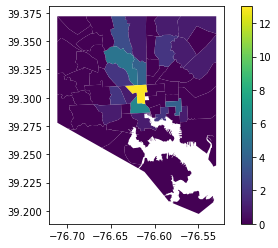

In [42]:
geoloom_w_csas.plot( column='pointsinpolygon', legend=True)

In [ ]:
geoloom_w_csas.head(1)

#### Polygons in Points

Alternately, you can run the ponp function and have returned the geoloom dataset

In [44]:
geoloom_w_csas = workWithGeometryData(method='ponp', df=geoloom_gdf, polys=csa_gdf, ptsCoordCol='geometry', polygonsCoordCol='geometry', polyColorCol='hhchpov18', polygonsLabel='CSA2010', pntsClr='red', polysClr='white')

We can count the totals per CSA using `value_counts`

Alternately, we could map the centroid of boundaries within another boundary to find boundaries within boundaries

In [ ]:
geoloom_w_csas['POINT_Y'] = geoloom_w_csas.centroid.y
geoloom_w_csas['POINT_X'] = geoloom_w_csas.centroid.x

# We already know the x and y columns because we just saved them as such.
geoloom_w_csas['POINT_X'] = pd.to_numeric(geoloom_w_csas['POINT_X'], errors='coerce')
geoloom_w_csas['POINT_Y'] = pd.to_numeric(geoloom_w_csas['POINT_Y'], errors='coerce')
# df = df.replace(np.nan, 0, regex=True)

# And filter out for points only in Baltimore City. 
geoloom_w_csas = geoloom_w_csas[ geoloom_w_csas['POINT_Y'] > 39.3  ]
geoloom_w_csas = geoloom_w_csas[ geoloom_w_csas['POINT_Y'] < 39.5  ]

In [47]:
map_points(geoloom_w_csas, lat_col='POINT_Y', lon_col='POINT_X', zoom_start=11, plot_points=True, cluster_points=False, 
           pt_radius=7, draw_heatmap=True, heat_map_weights_col='POINT_X', heat_map_weights_normalize=True, 
           heat_map_radius=15, popup='CSA2010')

[39.3059284576752, -76.6084962613261] Midtown
[39.354049947202, -76.594919959319] Northwood
[39.3053725867077, -76.6165491304473] Midtown
[39.3053725867077, -76.6165491304473] Midtown
[39.3053725867077, -76.6165491304473] Midtown
[39.3205305004358, -76.62029445046] Medfield/Hampden/Woodberry/Remington
[39.3132344995704, -76.6156319686376] Greater Charles Village/Barclay
[39.3025382004351, -76.6123550083559] Midtown
[39.330960442152, -76.6097324686376] North Baltimore/Guilford/Homeland
[39.3394246352966, -76.5728076182136] Lauraville
[39.3663642396761, -76.5807452381971] Loch Raven
[39.3112287786895, -76.6169870308888] Greater Charles Village/Barclay
[39.3313095000031, -76.6273815000012] Medfield/Hampden/Woodberry/Remington
[39.3111954460472, -76.6168148083572] Greater Charles Village/Barclay
[39.3097800000032, -76.6165900000012] Midtown
[39.3053725867077, -76.6165491304473] Midtown
[39.3140701557246, -76.6357692877849] Penn North/Reservoir Hill
[39.3140701557246, -76.6357692877849] Pen

But if that doesn't do it for you, we can also create heat maps and marker clusters

In [ ]:
# https://github.com/python-visualization/folium/blob/master/examples/MarkerCluster.ipynb

In [48]:
# MarkerCluster.ipynb
m = folium.Map(location=[39.28759453969165, -76.61278931706487], zoom_start=12)
marker_cluster = MarkerCluster().add_to(m)
stations = geoloom_w_csas.apply(lambda p: folium.Marker( location=[p['POINT_Y'],p['POINT_X']], popup='Add popup text here.', icon=None ).add_to(marker_cluster), axis=1 )
m

In [49]:
map_points(geoloom_w_csas, lat_col='POINT_Y', lon_col='POINT_X', zoom_start=11, plot_points=True, cluster_points=False, 
           pt_radius=15, draw_heatmap=False, heat_map_weights_col='POINT_X', heat_map_weights_normalize=True, 
           heat_map_radius=15, popup='CSA2010')

[39.3059284576752, -76.6084962613261] Midtown
[39.354049947202, -76.594919959319] Northwood
[39.3053725867077, -76.6165491304473] Midtown
[39.3053725867077, -76.6165491304473] Midtown
[39.3053725867077, -76.6165491304473] Midtown
[39.3205305004358, -76.62029445046] Medfield/Hampden/Woodberry/Remington
[39.3132344995704, -76.6156319686376] Greater Charles Village/Barclay
[39.3025382004351, -76.6123550083559] Midtown
[39.330960442152, -76.6097324686376] North Baltimore/Guilford/Homeland
[39.3394246352966, -76.5728076182136] Lauraville
[39.3663642396761, -76.5807452381971] Loch Raven
[39.3112287786895, -76.6169870308888] Greater Charles Village/Barclay
[39.3313095000031, -76.6273815000012] Medfield/Hampden/Woodberry/Remington
[39.3111954460472, -76.6168148083572] Greater Charles Village/Barclay
[39.3097800000032, -76.6165900000012] Midtown
[39.3053725867077, -76.6165491304473] Midtown
[39.3140701557246, -76.6357692877849] Penn North/Reservoir Hill
[39.3140701557246, -76.6357692877849] Pen

In [50]:
map_points(geoloom_w_csas, lat_col='POINT_Y', lon_col='POINT_X', zoom_start=11, plot_points=True, cluster_points=False,
               pt_radius=1, draw_heatmap=True, heat_map_weights_col=None, heat_map_weights_normalize=True,
               heat_map_radius=15, popup='CSA2010')

[39.3059284576752, -76.6084962613261] Midtown
[39.354049947202, -76.594919959319] Northwood
[39.3053725867077, -76.6165491304473] Midtown
[39.3053725867077, -76.6165491304473] Midtown
[39.3053725867077, -76.6165491304473] Midtown
[39.3205305004358, -76.62029445046] Medfield/Hampden/Woodberry/Remington
[39.3132344995704, -76.6156319686376] Greater Charles Village/Barclay
[39.3025382004351, -76.6123550083559] Midtown
[39.330960442152, -76.6097324686376] North Baltimore/Guilford/Homeland
[39.3394246352966, -76.5728076182136] Lauraville
[39.3663642396761, -76.5807452381971] Loch Raven
[39.3112287786895, -76.6169870308888] Greater Charles Village/Barclay
[39.3313095000031, -76.6273815000012] Medfield/Hampden/Woodberry/Remington
[39.3111954460472, -76.6168148083572] Greater Charles Village/Barclay
[39.3097800000032, -76.6165900000012] Midtown
[39.3053725867077, -76.6165491304473] Midtown
[39.3140701557246, -76.6357692877849] Penn North/Reservoir Hill
[39.3140701557246, -76.6357692877849] Pen

And Time Sliders

##### Choropleth Timeslider

https://github.com/python-visualization/folium/blob/master/examples/TimeSliderChoropleth.ipynb

To simulate that data is sampled at different times we random sample data for n_periods rows of data. __Note__ that the geodata and random sampled data is linked through the feature_id, which is the index of the GeoDataFrame.

In [ ]:
periods = 10
datetime_index = pd.date_range('2010', periods=periods, freq='Y')
dt_index_epochs = ( datetime_index.astype(int) ).astype('U10')
datetime_index

In [ ]:
# Style each boundry with randomness.
styledata = {}
for country in geoloom.index:
    df = pd.DataFrame(
        {'color': np.random.normal(size=periods),
         'opacity':  [1,2,3,4,5,6,7,8,9,1] },
        index=dt_index_epochs
    )
    df = df.cumsum()
    styledata[country] = df
ax = df.plot()

In [ ]:
df.head()

We see that we generated two series of data for each country; one for color and one for opacity. Let's plot them to see what they look like.

In [ ]:
max_color, min_color, max_opacity, min_opacity = 0, 0, 0, 0
for country, data in styledata.items():
    max_color = max(max_color, data['color'].max())
    min_color = min(max_color, data['color'].min())
    max_opacity = max(max_color, data['opacity'].max())
    max_opacity = min(max_color, data['opacity'].max())
linear.PuRd_09.scale(min_color, max_color)

We want to map the column named color to a hex color. To do this we use a normal colormap. To create the colormap, we calculate the maximum and minimum values over all the timeseries. We also need the max/min of the opacity column, so that we can map that column into a range [0,1].

In [ ]:
max_color, min_color, max_opacity, min_opacity = 0, 0, 0, 0
for country, data in styledata.items():
    max_color = max(max_color, data['color'].max())
    min_color = min(max_color, data['color'].min())
    max_opacity = max(max_color, data['opacity'].max())
    max_opacity = min(max_color, data['opacity'].max())

In [ ]:
from branca.colormap import linear
cmap = linear.PuRd_09.scale(min_color, max_color)
def norm(x): return (x - x.min()) / (x.max() - x.min())
for country, data in styledata.items():
    data['color'] = data['color'].apply(cmap)
    data['opacity'] = norm(data['opacity'])

Finally we use pd.DataFrame.to_dict() to convert each dataframe into a dictionary, and place each of these in a map from country id to data.

In [ ]:
geoloom.head(1)

In [ ]:
geoloom_gdf = gpd.read_file("https://services1.arcgis.com/mVFRs7NF4iFitgbY/ArcGIS/rest/services/Geoloom_Crowd/FeatureServer/0/query?where=1%3D1&outFields=*&returnGeometry=true&f=pgeojson");
m = folium.Map([39.28759453969165, -76.61278931706487], zoom_start=12)
g = TimeSliderChoropleth(
    geoloom_gdf.to_json(),
    styledict={
      str(country): data.to_dict(orient='index') for
      country, data in styledata.items()
    }
).add_to(m)
m